In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices.csv")
df.sample(5)

,area,bedrooms,age,price
5,4100,6,8,810000
3,3600,3,30,595000
1,3000,4,15,565000
4,4000,5,8,760000
0,2600,3,20,550000


In [3]:
df.drop('price', axis = 'columns')

,area,bedrooms,age
0,2600,3,20
1,3000,4,15
2,3200,3,18
3,3600,3,30
4,4000,5,8
5,4100,6,8


In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_X

array([[0.        , 0.        , 0.54545455],
       [0.26666667, 0.33333333, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.        , 1.        ],
       [0.93333333, 0.66666667, 0.        ],
       [1.        , 1.        , 0.        ]])

In [5]:
#reshape
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.        ],
       [0.05769231],
       [0.23076923],
       [0.17307692],
       [0.80769231],
       [1.        ]])

In [6]:
w = np.ones(shape=(3,))  # Change w to have shape (3,)
result = np.dot(w, scaled_X.T)
print(result)


[0.54545455 0.91818182 0.85454545 1.66666667 1.6        2.        ]


In [7]:
a = np.array([1,2,3])
b = np.array([10,5,7])
a-b


array([-9, -3, -4])

In [8]:
np.mean(np.square(a-b))

35.333333333333336

In [10]:
# equation:
# price = w1 * area + w2 * bedrooms + bias

def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape =(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted =  + np.dot(w,scaled_X.T) +b #w1 *area + w2*bedrooms
        
        w_grad =  - (2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        cost = np.square(y_true - y_predicted)
        
        if i%10 ==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w , b, cost, cost_list, epoch_list 
w, b, cost, cost_list, epoch_list= batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost
    

(array([1., 1., 1.]),
 0,
 array([0.29752066, 0.7404422 , 0.38909678, 2.23081032, 0.62775148,
        1.        ]))

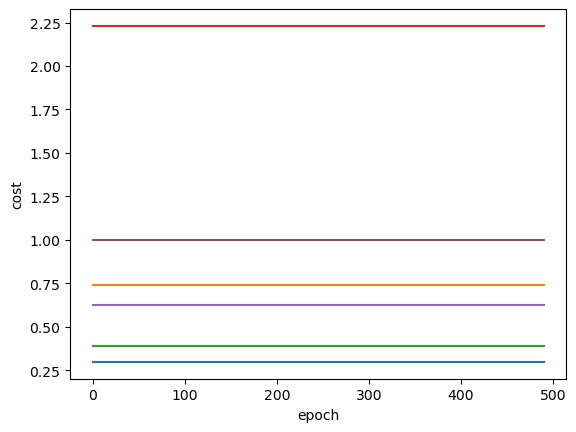

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
def predict(area, bedrooms,w,b):
    scaled_x = sx.tranform([[area, bedrooms]])
    scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] + b
    pass
predict(2600,4,w,b)